In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = "../data/componentes"
archivo_comp_principales_2dcpa = pd.read_csv(f'{path}/autovectores_pca.csv', header=None)
archivo_comp_principales_pca = pd.read_csv(f'{path}/autovectores_pca.csv', header=None)

autovalores_pca = np.array(list(archivo_comp_principales_pca.iloc[:, 0]))
autovectores_pca = [np.array(list(archivo_comp_principales_pca.iloc[i, :])[1:]) for i in range(len(autovalores_pca))]


with open(f'{path}/autovectores_2dpca.csv', 'r') as f:
    autovalores_2dcpa = np.array([float(x) for x in f.readline().split()])
    autovectores_2dcpa = np.array([np.array([float(x) for x in line.split()]) for line in f.readlines()])

lists = []
with open(f'{path}/media_desviacion_pca.txt', 'r') as f:  # replace 'file.txt' with your file pat
    array_string = ""
    for line in f:
        stripped_line = line.strip()
        if stripped_line.startswith('['):
            array_string += stripped_line[1:] + " "
        elif stripped_line.endswith(']'):
            array_string += stripped_line[:-1]
            array = np.fromstring(array_string, sep=' ')
            lists.append(array.tolist())
            array_string = ""
        else:
            array_string += stripped_line + " "

mean = np.array(lists[0])
sd = np.array(lists[1])


def covariance_matrix(X):
    #X = X - np.mean(X, axis=0)
    #Transform X in a numpy matrix
    X = np.matrix(X)
    n = X.shape[0]
    print("TAMAÑO DE X: ", X.shape)
    
    return (X.T @ X) / (n - 1)

def correlation_matrix(C):
    # Return Cij = Cij / sqrt(Cii*Cjj)
    C = np.matrix(C)
    D = np.zeros(C.shape)
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            D[i,j] += C[i,j] / np.sqrt(C[i,i] * C[j,j])
    return D


In [257]:
# PCA proper
def imagen_a_componentes_pca(imagenes, k):
    coordenadas_componentes = []

    for imagen in imagenes:
        coordenadas = np.array([np.dot((imagen - mean) / sd, autovectores_pca[i]) for i in range(k)])

        coordenadas_componentes.append(coordenadas)

    return coordenadas_componentes

def imagen_a_componentes_2dpca(imagenes, k):
    coordenadas_componentes = []
    

    for imagen in imagenes:
        # La coordenada i-esima es el feature vector i de la imagen
        coordenadas = np.array([((imagen - mean.reshape(56, 46)) / sd.reshape(56,46)) @ autovectores_2dcpa[i] for i in range(k)])

        coordenadas_componentes.append(coordenadas)

    return coordenadas_componentes

In [258]:
def load_imagen(indice_persona, indice_imagen):
    matriz_imagen = plt.imread(f"../data/caras/s{indice_persona}/{indice_imagen}.pgm")[::2,::2] / 255
    return matriz_imagen.flatten(), matriz_imagen

def load_all():
    #41 personas, 10 imagenes por persona
    imagenes = []
    imagenes_2dpca = []
    for i in range(1, 42):
        for j in range(1, 11):
            imagen = load_imagen(i, j)
            imagenes.append(imagen[0]) # Flattened image
            imagenes_2dpca.append(imagen[1]) # Original 2D image
    return imagenes, imagenes_2dpca

Matrices de Correlacion para el conjunto de datos original (centrado) y para los datos en el espacio z para dos valores de k distintos (uno bajo y otro mas grande).

In [264]:
imagenes_aplanadas, imagenes_2DPCA = load_all()
imagenes_aplanadas = np.array(imagenes_aplanadas)   
imagenes_aplanadas = imagenes_aplanadas - np.mean(imagenes_aplanadas, axis=0)

#Centrar las imagenes
#imagenes_aplanadas = imagenes_aplanadas - np.mean(imagenes_aplanadas, axis=0)
#imagenes_2DPCA = imagenes_2DPCA - np.mean(imagenes_2DPCA, axis=0)

'''''
#Matriz de correlacion de las imagenes centradas
CC = correlation_matrix(covariance_matrix(imagenes_aplanadas-np.mean(imagenes_aplanadas, axis=0)))
#plot and save
plt.imshow(CC)
plt.colorbar()
#add title
plt.title('Matriz de correlacion de las imagenes centradas')
#add labels
plt.savefig('./correlacion_imagenes_centradas.png')
plt.clf()
'''''

'''''
#Matriz de correlacion para la transformacion PCA low k
matriz_correlacion_pca_low_k = correlation_matrix(covariance_matrix(imagen_a_componentes_pca(imagenes_aplanadas, 20)))
#plot and save
plt.imshow(matriz_correlacion_pca_low_k)
plt.title('Matriz de correlacion de imagenes transformadas PCA k = 20')
plt.colorbar()
plt.savefig('./correlacion_imagenes_componentes_pca_low_k.png')
plt.clf()
'''''

'''''
matriz_correlacion_pca_mid_k = correlation_matrix(covariance_matrix(imagen_a_componentes_pca(imagenes_aplanadas, 100)))
#plot and save
plt.imshow(matriz_correlacion_pca_mid_k)
plt.title('Matriz de correlacion de imagenes transformadas PCA k = 100')
plt.colorbar()
plt.savefig('./correlacion_imagenes_componentes_pca_mid_k.png')
plt.clf()
'''''

'''''
#Matriz de correlacion para la transformacion PCA high k
matriz_correlacion_pca_high_k = correlation_matrix(covariance_matrix(imagen_a_componentes_pca(imagenes_aplanadas, 409)))
#plot and save
plt.imshow(matriz_correlacion_pca_high_k)
plt.title('Matriz de correlacion de imagenes transformadas PCA k = 409')
plt.colorbar()
plt.savefig('./correlacion_imagenes_componentes_pca_high_k.png')
plt.clf()
'''''


coordenadas_2dcpa_low_k = imagen_a_componentes_2dpca(imagenes_2DPCA, 5)
coordenadas_2dcpa_concatenadas_low_k = np.concatenate(coordenadas_2dcpa_low_k, axis=0)
#Matriz de correlacion para la transformacion 2DPCA low k
C_2DPCA_low_k = correlation_matrix(covariance_matrix(coordenadas_2dcpa_concatenadas_low_k))
plt.imshow(C_2DPCA_low_k)
#plot and save
plt.colorbar()
plt.title('Matriz de correlacion de imagenes 2DPCA k=5')
plt.savefig('./correlacion_imagenes_componentes_2dpca_low_k.png')
plt.clf()

coordenadas_2dcpa_mid_k = imagen_a_componentes_2dpca(imagenes_2DPCA, 20)
coordenadas_2dcpa_concatenadas_mid_k = np.concatenate(coordenadas_2dcpa_mid_k, axis=0)
#Matriz de correlacion para la transformacion 2DPCA mid k
C_2DPCA_mid_k = correlation_matrix(covariance_matrix(coordenadas_2dcpa_concatenadas_mid_k))
plt.imshow(C_2DPCA_mid_k)
#plot and save
plt.colorbar()
plt.title('Matriz de correlacion de imagenes 2DPCA k=20')
plt.savefig('./correlacion_imagenes_componentes_2dpca_mid_k.png')
plt.clf()

coordenadas_2dcpa_high_k = imagen_a_componentes_2dpca(imagenes_2DPCA, 46)
coordenadas_2dcpa_concatenadas_high_k = np.concatenate(coordenadas_2dcpa_high_k, axis=0)
#Matriz de correlacion para la transformacion 2DPCA high k
C_2DPCA_high_k = correlation_matrix(covariance_matrix(coordenadas_2dcpa_concatenadas_high_k))
plt.imshow(C_2DPCA_high_k)
#plot and save
plt.colorbar()
plt.savefig('./correlacion_imagenes_componentes_2dpca_high_k.png')
plt.clf()


TypeError: imagen_a_componentes_2dpca() takes 2 positional arguments but 3 were given

<Figure size 640x480 with 0 Axes>

Promedio de Matrices de Correlacion para cada cara representada por PCA

In [ ]:
#A cada cara calculo su matriz correlacion de la transformacion y las promedio. Para PCA y 2DPCA
#10 matrices de correlacion, a cada una la promedio. Sumo las matrices y las divido por n. 
#Cargo las imagenes de cada carpeta y genero la matriz de correlacion de cada una.
'''''
caras_pca = []
caras_2dpca = []
for i in range(1, 42):
    caras_pca.append([])
    caras_2dpca.append([])
    for j in range(1, 11):
        cara_pca, cara_2dpca = load_imagen(i, j)
        caras_pca[i-1].append(cara_pca)
        caras_2dpca[i-1].append(cara_2dpca)

caras_pca = np.array(caras_pca)
caras_2dpca = np.array(caras_2dpca)

k_2dpca = [2, 8, 20]

#Matriz de correlacion de cada cara
matrices_correlacion_caras_pca_low_k = []
matrices_correlacion_caras_pca_mid_k = []
matrices_correlacion_caras_pca_high_k = []

#El promedio de los valores de similaridad para las comparaciones entre imagenes de una misma persona
#Esto implica obtener la matriz de correlacion de cada cara y promediarla entre la cantidad de imagenes de cada persona

for cara in caras_pca:
    #PCA low k
    low_k_image_pca = imagen_a_componentes(cara, 20, True)
    #array numpy
    low_k_image_pca = np.array(low_k_image_pca)
    matrices_correlacion_caras_pca_low_k.append(correlation_matrix(covariance_matrix(low_k_image_pca)))

    #PCA mid k
    mid_k_image_pca = imagen_a_componentes(cara, 100, True)
    #array numpy
    mid_k_image_pca = np.array(mid_k_image_pca)
    matrices_correlacion_caras_pca_mid_k.append(correlation_matrix(covariance_matrix(mid_k_image_pca)))

    #PCA high k
    high_k_image_pca = imagen_a_componentes(cara, 409, True)
    #array numpy
    high_k_image_pca = np.array(high_k_image_pca)
    matrices_correlacion_caras_pca_high_k.append(correlation_matrix(covariance_matrix(high_k_image_pca)))


#Promedio de las matrices de correlacion de cada cara para PCA low, mid, high K.
matriz_correlacion_promedio_caras_pca_low_k = np.sum(matrices_correlacion_caras_pca_low_k, axis=0)/41
matriz_correlacion_promedio_caras_pca_mid_k = np.sum(matrices_correlacion_caras_pca_mid_k, axis=0)/41
matriz_correlacion_promedio_caras_pca_high_k = np.sum(matrices_correlacion_caras_pca_high_k, axis=0)/41


#Plot matriz_correlacion_promedio_caras_pca_low_k
plt.imshow(matriz_correlacion_promedio_caras_pca_low_k)
plt.title('AVG de matrices de correlacion de cada cara PCA k=20')
plt.colorbar()
plt.savefig('./matriz_correlacion_promedio_caras_pca_low_k.png')

plt.clf()

#Plot matriz_correlacion_promedio_caras_pca_mid_k
plt.imshow(matriz_correlacion_promedio_caras_pca_mid_k)
plt.title('AVG de matrices de correlacion de cada cara PCA k=100')
plt.colorbar()
plt.savefig('./matriz_correlacion_promedio_caras_pca_mid_k.png')

plt.clf()

#Plot matriz_correlacion_promedio_caras_pca_high_k
plt.imshow(matriz_correlacion_promedio_caras_pca_high_k)
plt.title('AVG de matrices de correlacion de cada cara PCA k=409')
plt.colorbar()
plt.savefig('./matriz_correlacion_promedio_caras_pca_high_k.png')
'''''


"''\ncaras_pca = []\ncaras_2dpca = []\nfor i in range(1, 42):\n    caras_pca.append([])\n    caras_2dpca.append([])\n    for j in range(1, 11):\n        cara_pca, cara_2dpca = load_imagen(i, j)\n        caras_pca[i-1].append(cara_pca)\n        caras_2dpca[i-1].append(cara_2dpca)\n\ncaras_pca = np.array(caras_pca)\ncaras_2dpca = np.array(caras_2dpca)\n\nk_2dpca = [2, 8, 20]\n\n#Matriz de correlacion de cada cara\nmatrices_correlacion_caras_pca_low_k = []\nmatrices_correlacion_caras_pca_mid_k = []\nmatrices_correlacion_caras_pca_high_k = []\n\n#El promedio de los valores de similaridad para las comparaciones entre imagenes de una misma persona\n#Esto implica obtener la matriz de correlacion de cada cara y promediarla entre la cantidad de imagenes de cada persona\n\nfor cara in caras_pca:\n    #PCA low k\n    low_k_image_pca = imagen_a_componentes(cara, 20, True)\n    #array numpy\n    low_k_image_pca = np.array(low_k_image_pca)\n    matrices_correlacion_caras_pca_low_k.append(correlation

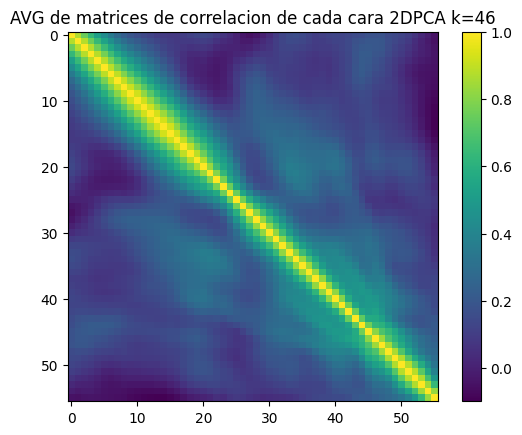

In [ ]:
#A cada cara calculo su matriz correlacion de la transformacion y las promedio. Para PCA y 2DPCA
#10 matrices de correlacion, a cada una la promedio. Sumo las matrices y las divido por n. 
#Cargo las imagenes de cada carpeta y genero la matriz de correlacion de cada una.
'''''
caras_2dpca = []
personas = []
for i in range(1, 42):
    caras_2dpca.append([])
    personas.append([])
    for j in range(1, 11):
        cara_pca, cara_2dpca = load_imagen(i, j)
        personas[i-1].append(cara_2dpca)
        caras_2dpca[i-1].append(cara_2dpca)

caras_2dpca = np.array(caras_2dpca)


#Matriz de correlacion de cada cara
matrices_correlacion_caras_2dpca_low_k = []
matrices_correlacion_caras_2dpca_mid_k = []
matrices_correlacion_caras_2dpca_high_k = []

#El promedio de los valores de similaridad para las comparaciones entre imagenes de una misma persona
#Esto implica obtener la matriz de correlacion de cada cara y promediarla entre la cantidad de imagenes de cada persona

for i in range(1, 42):
    imagenes = np.array(personas[i-1])
    #Flattened reshape
    componentes_low_k = imagen_a_componentes_2dpca(imagenes, 5)
    #Concateno
    imagenes_concatenadas = np.concatenate(componentes_low_k, axis=0)
    #Calculo la matriz de covarianza
    matrices_correlacion_caras_2dpca_low_k.append(correlation_matrix(covariance_matrix(imagenes_concatenadas)))

    componentes_mid_k = imagen_a_componentes_2dpca(imagenes, 15)
    #Concateno
    imagenes_concatenadas = np.concatenate(componentes_mid_k, axis=0)
    #Calculo la matriz de covarianza
    matrices_correlacion_caras_2dpca_mid_k.append(correlation_matrix(covariance_matrix(imagenes_concatenadas)))

    componentes_high_k = imagen_a_componentes_2dpca(imagenes, 46)
    #Concateno
    imagenes_concatenadas = np.concatenate(componentes_high_k, axis=0)
    #Calculo la matriz de covarianza
    matrices_correlacion_caras_2dpca_high_k.append(correlation_matrix(covariance_matrix(imagenes_concatenadas)))
  

#Promedio de las matrices de correlacion de cada cara para 2DPCA low, mid, high K.
matriz_correlacion_promedio_caras_2dpca_low_k = np.sum(matrices_correlacion_caras_2dpca_low_k, axis=0)/41
matriz_correlacion_promedio_caras_2dpca_mid_k = np.sum(matrices_correlacion_caras_2dpca_mid_k, axis=0)/41
matriz_correlacion_promedio_caras_2dpca_high_k = np.sum(matrices_correlacion_caras_2dpca_high_k, axis=0)/41
#save
plt.imshow(matriz_correlacion_promedio_caras_2dpca_low_k)
plt.title('AVG de matrices de correlacion de cada cara 2DPCA k=5')
plt.colorbar()
plt.savefig('./matriz_correlacion_promedio_caras_2dpca_low_k.png')

plt.clf()

plt.imshow(matriz_correlacion_promedio_caras_2dpca_mid_k)
plt.title('AVG de matrices de correlacion de cada cara 2DPCA k=15')
plt.colorbar()
plt.savefig('./matriz_correlacion_promedio_caras_2dpca_mid_k.png')

plt.clf()

plt.imshow(matriz_correlacion_promedio_caras_2dpca_high_k)
plt.title('AVG de matrices de correlacion de cada cara 2DPCA k=46')
plt.colorbar()
plt.savefig('./matriz_correlacion_promedio_caras_2dpca_high_k.png')
'''''

Promedio Matrices de Correlacion para cada cara representada por 2DPCA